In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [240]:
train=pd.read_csv('train (2).csv')
test=pd.read_csv('test (1).csv')
target=train['Survived']
train_org=train[:]
test_org=test[:]
train=train.drop('Survived',axis=1)
dataset=[train,test]

In [241]:
df=pd.concat(dataset)

In [242]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [244]:
df.shape

(1309, 11)

In [245]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [246]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [247]:
df=df.drop('Cabin',axis=1)
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [248]:
df=df.drop('Ticket',axis=1)
df.shape

(1309, 9)

In [249]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,C


In [250]:

df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [251]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])

In [252]:
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

In [253]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,4
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,4
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,4


In [254]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

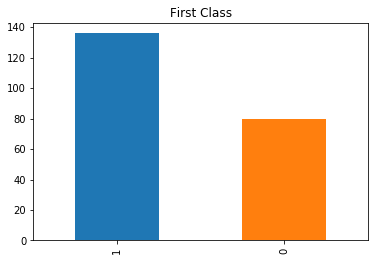

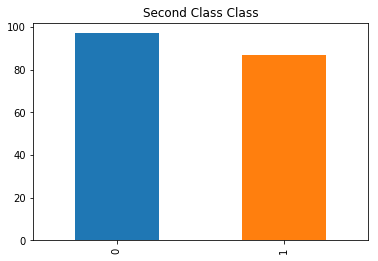

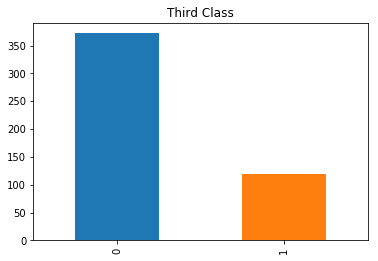

In [255]:
train_org.Survived[train_org.Pclass==1].value_counts().plot(kind='bar')
plt.title('First Class')
plt.show()
train_org.Survived[train_org.Pclass==2].value_counts().plot(kind='bar')
plt.title('Second Class Class')
plt.show()
train_org.Survived[train_org.Pclass==3].value_counts().plot(kind='bar')
plt.title('Third Class')
plt.show()

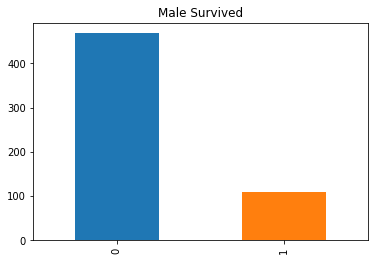

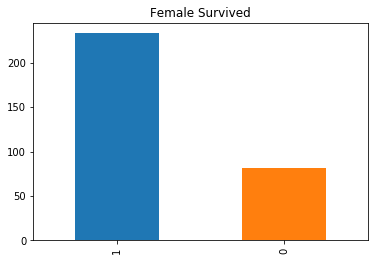

In [256]:
train_org['Survived'][train_org['Sex']=='male'].value_counts().plot(kind='bar')
plt.title('Male Survived')
plt.show()
train_org['Survived'][train_org['Sex']=='female'].value_counts().plot(kind='bar')
plt.title('Female Survived')
plt.show()

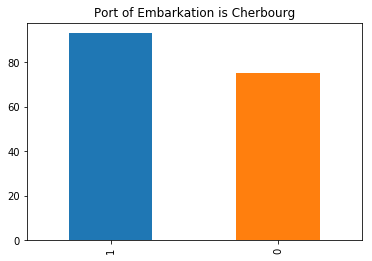

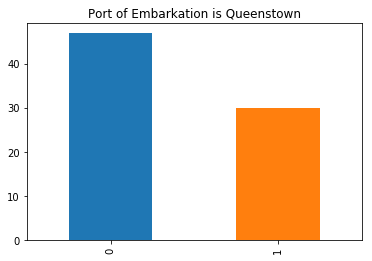

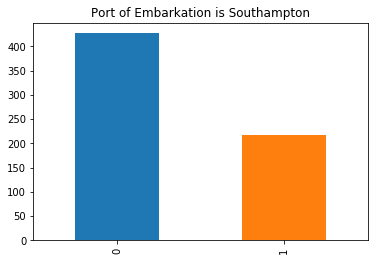

In [257]:
train_org.Survived[train_org['Embarked']=='C'].value_counts().plot(kind='bar')
plt.title('Port of Embarkation is Cherbourg')
plt.show()
train_org.Survived[train_org['Embarked']=='Q'].value_counts().plot(kind='bar')
plt.title('Port of Embarkation is Queenstown')
plt.show()
train_org.Survived[train_org['Embarked']=='S'].value_counts().plot(kind='bar')
plt.title('Port of Embarkation is Southampton')
plt.show()

In [258]:
print df['Pclass'].value_counts()
print df['Sex'].value_counts()
print df['Embarked'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64
1    843
0    466
Name: Sex, dtype: int64
4    914
2    270
3    123
1      1
0      1
Name: Embarked, dtype: int64


In [259]:
train_org[['Survived','SibSp']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [260]:
train_org[['Survived','Parch']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


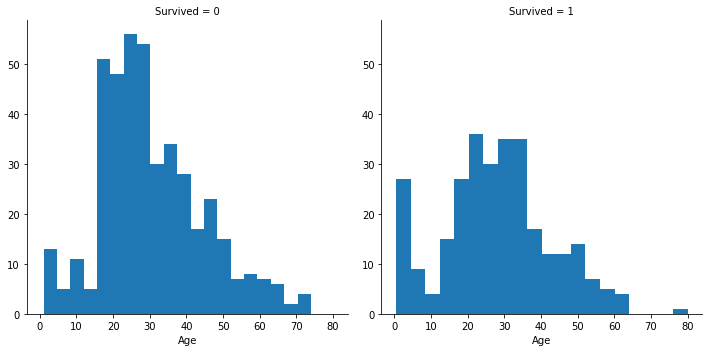

In [261]:
g=sns.FacetGrid(train_org,col='Survived',size=5)
g.map(plt.hist,'Age',bins=20)
plt.show()

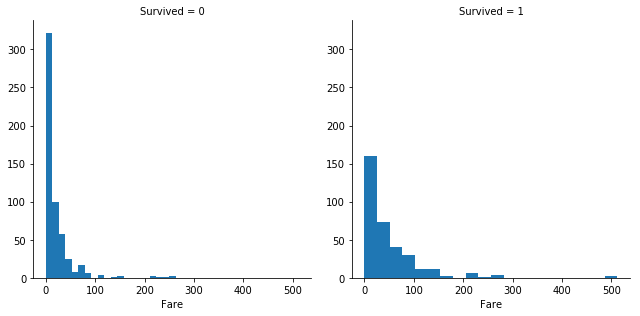

In [262]:
g=sns.FacetGrid(train_org,col='Survived',size=4.5)
g.map(plt.hist,'Fare',bins=20)
plt.show()

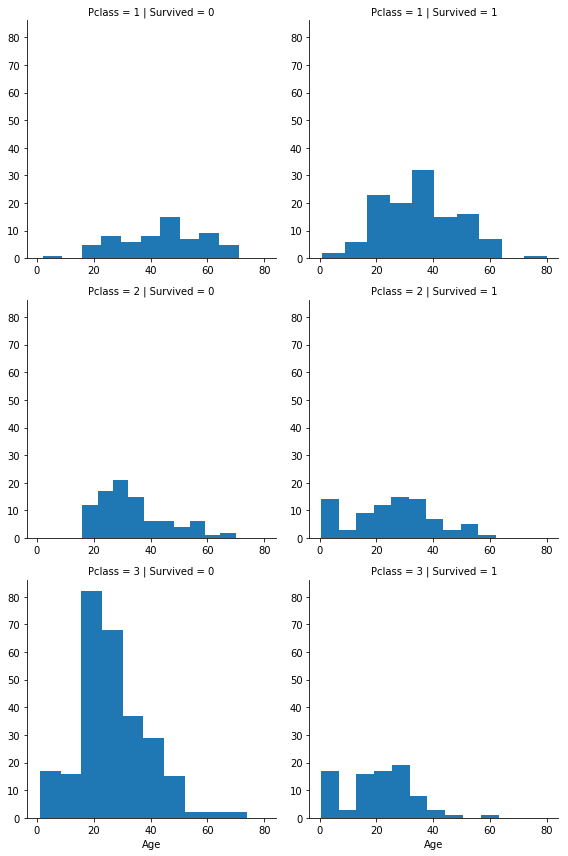

In [263]:
h=sns.FacetGrid(train_org,row='Pclass',col='Survived',size=4)
h.map(plt.hist,'Age')
plt.show()

In [264]:
for data in dataset:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [265]:
df['Title']=df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df['Title']=df['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','Dona'],'Rare')
df['Title']=df['Title'].replace('Mlle','Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')

In [266]:
title_dict={
    'Rare':1,
    'Master':2,
    'Mrs':3,
    'Mr':4,
    'Miss':5
}
df['Title']=df['Title'].map(title_dict)

In [267]:
df=df.drop(['Name','PassengerId'],axis=1)

In [268]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,4,4.0
1,1,0,38.0,1,0,71.2833,2,3.0
2,3,0,26.0,0,0,7.9250,4,5.0
3,1,0,35.0,1,0,53.1000,4,3.0
4,3,1,35.0,0,0,8.0500,4,4.0


In [269]:
divide=train.shape[0]

In [270]:
df['Title']=df['Title'].fillna(0)

In [271]:
df['Title']=df['Title'].astype(int)
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Title         int32
dtype: object

In [272]:
print df[:891]['Age'].isnull().sum()
print df[891:]['Age'].isnull().sum()
print df[:891]['Embarked'].isnull().sum()
print df[891:]['Embarked'].isnull().sum()
print df[:891]['Fare'].isnull().sum()
print df[891:]['Fare'].isnull().sum()
print df[:891]['Title'].isnull().sum()
print df[891:]['Title'].isnull().sum()

177
86
0
0
0
1
0
0


In [273]:
df[['Sex','Pclass','Age','Title']].groupby(['Sex','Pclass','Title'],as_index=False).median()

,Sex,Pclass,Title,Age
0,0,1,0,33.0
1,0,1,1,31.5
2,0,1,3,45.0
3,0,1,5,30.0
4,0,2,1,28.0
5,0,2,3,30.5
6,0,2,5,20.0
7,0,3,1,NaN
8,0,3,3,31.0
9,0,3,5,18.0


In [274]:
def impute_ages(x):
    if not(np.isnan(x['Age'])):
        return x['Age']
    if x['Sex']==0 and x['Pclass']==1:
        if x['Title']==0:
            return 33.0
    if x['Sex']==0 and x['Pclass']==1:
        if x['Title']==1:
            return 31.5
    if x['Sex']==0 and x['Pclass']==1:
        if x['Title']==3:
            return 45.0       
    if x['Sex']==0 and x['Pclass']==1:
        if x['Title']==5:
            return 30.0
    if x['Sex']==0 and x['Pclass']==2:
        if x['Title']==1:
            return 28.0
    if x['Sex']==0 and x['Pclass']==2:
        if x['Title']==3:
            return 30.5
    if x['Sex']==0 and x['Pclass']==2:
        if x['Title']==5:
            return 20.0
    if x['Sex']==0 and x['Pclass']==3:
        if x['Title']==1:
            return 0
        
    if x['Sex']==0 and x['Pclass']==3:
        if x['Title']==3:
            return 31.0
    if x['Sex']==0 and x['Pclass']==3:
        if x['Title']==5:
            return 18.0
    if x['Sex']==1 and x['Pclass']==1:
        if x['Title']==1:
            return 49.5
    if x['Sex']==1 and x['Pclass']==1:
        if x['Title']==2:
            return 6.0
    if x['Sex']==1 and x['Pclass']==1: 
        if x['Title']==4:
            return 41.5
    if x['Sex']==1 and x['Pclass']==2: 
        if x['Title']==1:
            return 41.5
    if x['Sex']==1 and x['Pclass']==2:  
        if x['Title']==2:
            return 2.0
    if x['Sex']==1 and x['Pclass']==2: 
        if x['Title']==4:
            return 30.0
    if x['Sex']==1 and x['Pclass']==3:
        if x['Title']==2:
            return 6.0
    if x['Sex']==1 and x['Pclass']==3:
        if x['Title']==4:
            return 26.0
            
    
    
    

In [275]:
df['Age']=df.apply(impute_ages,axis=1)

In [276]:
df['Age']=df['Age'].astype(int)
df.dtypes

Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Title         int32
dtype: object

In [277]:
df['Family']=df['SibSp']+df['Parch']+1
df=df.drop(['SibSp','Parch'],axis=1)

In [278]:
df['IsAlone']=0
df.loc[df['Family']==1,'IsAlone']=1

In [279]:
df['Child']=0
df.loc[df['Age']<=16,'Child']=1

In [280]:
df['Agerange']=pd.cut(df['Age'],5)
df['Agerange'].unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [281]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']=4

In [282]:
df.describe()

,Pclass,Sex,Age,Fare,Embarked,Title,Family,IsAlone,Child
count,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,1.314744,33.295479,3.488159,3.876241,1.883881,0.603514,0.109244
std,0.837836,0.478997,0.811012,51.758668,0.822591,0.871723,1.583639,0.489354,0.312064
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,7.895800,3.000000,4.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,14.454200,4.000000,4.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,2.000000,31.275000,4.000000,4.000000,2.000000,1.000000,0.000000
max,3.000000,1.000000,4.000000,512.329200,4.000000,5.000000,11.000000,1.000000,1.000000


In [283]:
X=df[:divide]


In [284]:
X['Farerange']=pd.qcut(X['Fare'],4)
X['Farerange'].unique()

C:\Users\Dellpc\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [285]:
X.loc[ X['Fare'] <= 7.91, 'Fare'] = 0
X.loc[(X['Fare'] > 7.91) & (X['Fare'] <= 14.454), 'Fare'] = 1
X.loc[(X['Fare'] > 14.454) & (X['Fare'] <= 31), 'Fare']   = 2
X.loc[ X['Fare'] > 31, 'Fare'] = 3
X['Fare'] = X['Fare'].astype(int)

C:\Users\Dellpc\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [286]:
X.describe()

,Pclass,Sex,Age,Fare,Embarked,Title,Family,IsAlone,Child
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,1.317621,1.505051,3.528620,3.882155,1.904602,0.602694,0.116723
std,0.836071,0.477990,0.825924,1.118148,0.804496,0.889784,1.613459,0.489615,0.321270
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.500000,3.000000,4.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,0.000000
max,3.000000,1.000000,4.000000,3.000000,4.000000,5.000000,11.000000,1.000000,1.000000


In [287]:
X.dtypes

Pclass          int64
Sex             int64
Age             int32
Fare            int32
Embarked        int64
Title           int32
Family          int64
IsAlone         int64
Child           int64
Agerange     category
Farerange    category
dtype: object

In [288]:
X=X.drop(['Agerange','Farerange'],axis=1)

In [289]:
Y=target

In [290]:
test1=df[divide:]
test1.Fare.fillna(test1.Fare.median(),inplace=True)


In [291]:
test1['Farerange']=pd.qcut(test1['Fare'],4)
test1['Farerange'].unique()

C:\Users\Dellpc\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[(-0.001, 7.896], (7.896, 14.454], (14.454, 31.472], (31.472, 512.329]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

In [292]:
test1.loc[test1['Fare'] <= 7.89, 'Fare'] = 0
test1.loc[(test1['Fare'] > 7.91) & (test1['Fare'] <= 14.454), 'Fare'] = 1
test1.loc[(test1['Fare'] > 14.454) & (test1['Fare'] <= 31.47), 'Fare']   = 2
test1.loc[ test1['Fare'] > 31.47, 'Fare'] = 3
test1['Fare'] = test1['Fare'].astype(int)

C:\Users\Dellpc\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [293]:
test1.dtypes

Pclass          int64
Sex             int64
Age             int32
Fare            int32
Embarked        int64
Title           int32
Family          int64
IsAlone         int64
Child           int64
Agerange     category
Farerange    category
dtype: object

In [294]:
test1=test1.drop(['Agerange','Farerange'],axis=1)

In [295]:
test1.describe()

,Pclass,Sex,Age,Fare,Embarked,Title,Family,IsAlone,Child
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,1.308612,1.667464,3.401914,3.863636,1.839713,0.605263,0.093301
std,0.841838,0.481622,0.779210,1.418258,0.854496,0.832821,1.519072,0.489380,0.291203
min,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,2.000000,3.000000,4.000000,4.000000,2.000000,1.000000,0.000000
max,3.000000,1.000000,4.000000,7.000000,4.000000,5.000000,11.000000,1.000000,1.000000


In [58]:
steps=[('svm',SVC())]
pipeline=Pipeline(steps)

In [62]:
params={'svm__C':np.linspace(0.001,1,num=10),'svm__gamma':np.linspace(0.001,1,num=10)}

In [1]:
cv=GridSearchCV(pipeline,param_grid=params,cv=5)
cv.fit(X,Y)
print cv.best_score_
print cv.best_params_

NameError: name 'GridSearchCV' is not defined

In [1158]:
steps1=[('rf',RandomForestClassifier())]
pipeline1=Pipeline(steps1)

In [1159]:
params1={'rf__max_depth':[2,4,5,6,8],'rf__min_samples_split':[2,3,5,10,15],'rf__min_samples_leaf':[1,2,3,5,10],'rf__max_depth':[5,6,8,15,None],'rf__n_estimators':[5,10,15,25,100]}

In [1160]:
cv1=GridSearchCV(pipeline1,param_grid=params1,cv=10)
cv1.fit(X,Y)
print cv1.best_score_
print cv1.best_params_

0.837261503928
{'rf__min_samples_split': 15, 'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 15}


In [296]:
dtrain=xgb.DMatrix(X,label=Y)

In [297]:
params={'max_depth':5,'eta':0.05,'objective':'binary:logistic'}

In [298]:
num_boost_round=999

In [299]:
model=xgb.train(params,dtrain,num_boost_round=num_boost_round,evals=[(dtrain,'Train')],early_stopping_rounds=10)

[0]	Train-error:0.158249
Will train until Train-error hasn't improved in 10 rounds.
[1]	Train-error:0.158249
[2]	Train-error:0.158249
[3]	Train-error:0.158249
[4]	Train-error:0.158249
[5]	Train-error:0.158249
[6]	Train-error:0.158249
[7]	Train-error:0.159371
[8]	Train-error:0.158249
[9]	Train-error:0.158249
[10]	Train-error:0.156004
[11]	Train-error:0.156004
[12]	Train-error:0.154882
[13]	Train-error:0.15376
[14]	Train-error:0.15376
[15]	Train-error:0.15376
[16]	Train-error:0.152637
[17]	Train-error:0.154882
[18]	Train-error:0.152637
[19]	Train-error:0.152637
[20]	Train-error:0.152637
[21]	Train-error:0.152637
[22]	Train-error:0.152637
[23]	Train-error:0.152637
[24]	Train-error:0.152637
[25]	Train-error:0.152637
[26]	Train-error:0.152637
Stopping. Best iteration:
[16]	Train-error:0.152637



In [300]:
clf=xgb.XGBClassifier(learning_rate=0.05,max_depth=5,n_estimators=500,subsample=0.8)

In [ ]:
x=xgb.cv(params,dtrain,num_boost_round=16,nfold=5,metrics='accuracy')

In [301]:
clf.fit(X,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [302]:
svc=SVC(C=6,probability=True)
svc.fit(X,Y)

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [303]:
pred=svc.predict(X)
from sklearn.metrics import accuracy_score

In [304]:
accuracy_score(Y,pred)

0.85185185185185186

In [305]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [306]:
pred1=rf.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(Y,pred1)

0.8843995510662177

In [307]:
predict=clf.predict(X)
from sklearn.metrics import accuracy_score

In [308]:
accuracy_score(Y,predict)

0.877665544332211

In [316]:
rf=xgb.XGBClassifier(max_depth=5,learning_rate=0.05,n_estimators=500,subsample=0.8)
rf.fit(X,Y)
final_test=rf.predict(test1)


final=pd.DataFrame({'PassengerId':test_org['PassengerId'],"Survived":final_test})

In [315]:
final.to_csv('final1.csv',index=False)